**Vamos experimentar agora o algoritmo Decision Tree?**

In [1]:
%pip -q install yellowbrick
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [3]:
import pickle
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [4]:
modelo = DecisionTreeClassifier()

In [5]:
param_dist = {
    "max_depth": randint(1, 7),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "criterion": ["gini", "entropy"]
}
random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A934287850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A9770B4100>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A9770B4F10>},
                   random_state=42)

In [6]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 13}

In [7]:
modelo = DecisionTreeClassifier(max_depth=random_search.best_params_['max_depth'],criterion=random_search.best_params_['criterion'],min_samples_leaf=random_search.best_params_['min_samples_leaf'],min_samples_split=random_search.best_params_['min_samples_split'])
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, min_samples_split=13)



> **Vamos testar o modelo?**



In [8]:
previsoes = modelo.predict(X_teste)

In [9]:
modelo.n_features_in_

26

In [10]:
previsoes

array([2., 1., 1., ..., 1., 2., 1.])



> **Será se o modelo acertou?**



In [11]:
y_teste

array([2., 1., 1., ..., 1., 2., 1.])

In [12]:
accuracy_score(y_teste,previsoes)

0.8241981323589119

In [13]:
confusion_matrix(y_teste, previsoes)

array([[1038,  153],
       [ 280,  992]], dtype=int64)

0.8241981323589119

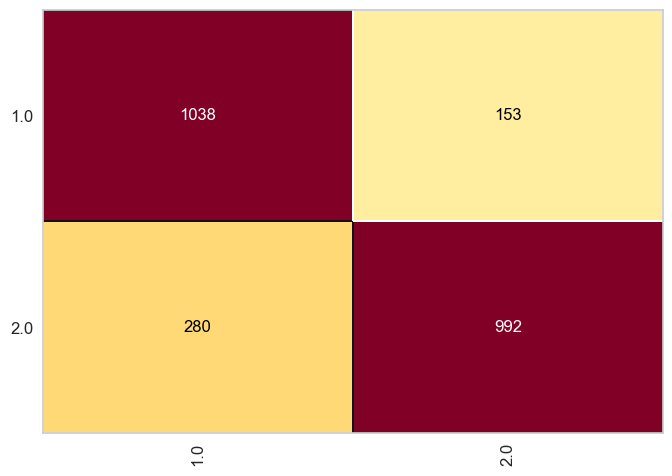

In [14]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [15]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         1.0       0.79      0.87      0.83      1191
         2.0       0.87      0.78      0.82      1272

    accuracy                           0.82      2463
   macro avg       0.83      0.83      0.82      2463
weighted avg       0.83      0.82      0.82      2463



In [16]:
modelo.classes_

array([1., 2.])

In [17]:
print(modelo.feature_importances_)


[0.00000000e+00 4.86503903e-02 0.00000000e+00 4.77603429e-03
 1.28908424e-01 2.15982613e-01 2.95334472e-01 1.86048023e-02
 2.67709559e-02 2.27799329e-02 3.17835691e-04 1.14350322e-03
 2.05737549e-03 1.93233106e-05 0.00000000e+00 3.53730211e-04
 1.74799932e-01 5.44661842e-02 2.94719426e-03 2.51829798e-05
 0.00000000e+00 0.00000000e+00 9.00590578e-04 0.00000000e+00
 8.69286144e-04 2.92237479e-04]


In [18]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoresRF = cross_val_score(modelo, X_treino, y_treino, cv=kf)
print("Acurácia média AD:", scoresRF, scoresRF.mean(), "+-", scoresRF.std())

Acurácia média AD: [0.81744422 0.81725888 0.79695431 0.82030457 0.8071066  0.81319797
 0.81624365 0.77664975 0.80913706 0.80812183] 0.8082418838356278 +- 0.012359877564461642


In [19]:
previsores = ['C006','C008','I00102','Q046017','Q046015','Q046018','Q03802','Q02901','Q03002','N001','N00101','N011','P00103','P00404','P02401','P02002','P018','P023','P027','P035','P05401','P052','P053','P050','P058','VDF004']
class_names = [str(cls) for cls in modelo.classes_]
print(len(previsores))
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(100,100))
tree.plot_tree(random_search.best_estimator_, filled=True, feature_names=previsores, class_names=class_names)
tree.plot_tree(modelo, feature_names=previsores, class_names = class_names, filled=True)
# plt.figure(figsize=(100,100))  # Adjust the figure size as needed
# tree.plot_tree(modelo, filled=True, feature_names=previsores, class_names=class_names)
# plt.show()

26


[Text(0.5146276595744681, 0.9285714285714286, 'P018 <= 6.5\ngini = 0.5\nsamples = 9851\nvalue = [4966, 4885]\nclass = 1.0'),
 Text(0.28856382978723405, 0.7857142857142857, 'P023 <= 6.5\ngini = 0.436\nsamples = 4105\nvalue = [2786, 1319]\nclass = 1.0'),
 Text(0.4015957446808511, 0.8571428571428572, 'True  '),
 Text(0.15425531914893617, 0.6428571428571429, 'Q046018 <= 1.75\ngini = 0.316\nsamples = 2098\nvalue = [1686.0, 412.0]\nclass = 1.0'),
 Text(0.0851063829787234, 0.5, 'Q046018 <= 1.25\ngini = 0.37\nsamples = 1601\nvalue = [1209, 392]\nclass = 1.0'),
 Text(0.0425531914893617, 0.35714285714285715, 'Q03802 <= 1.25\ngini = 0.254\nsamples = 1286\nvalue = [1094.0, 192.0]\nclass = 1.0'),
 Text(0.02127659574468085, 0.21428571428571427, 'P00103 <= 0.397\ngini = 0.045\nsamples = 306\nvalue = [299.0, 7.0]\nclass = 1.0'),
 Text(0.010638297872340425, 0.07142857142857142, 'gini = 0.123\nsamples = 61\nvalue = [57, 4]\nclass = 1.0'),
 Text(0.031914893617021274, 0.07142857142857142, 'gini = 0.024\ns

In [22]:
f1s = []

for train_index, test_index in kf.split(X_treino,y_treino):
    X_train, X_val = X_treino[train_index], X_treino[test_index]
    y_train, y_val = y_treino[train_index], y_treino[test_index]
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_teste)
    f1 = f1_score(y_teste, y_pred)
    f1s.append(f1)
    # Now you have train and validation sets for each fold
print("Accuracies for each fold:", f1s, "\nMedia:",np.mean(f1s), "\nDesvio:", np.std(f1s))

Accuracies for each fold: [0.8196591359492668, 0.828548644338118, 0.8035714285714286, 0.8276959808993235, 0.8248146703082325, 0.8234375, 0.8244213886671987, 0.8082815734989648, 0.8208653457339264, 0.8159362549800797] 
Media: 0.819723192294654 
Desvio: 0.007814639243813372
